In [1]:
# Import the required modules
from sqlalchemy import create_engine as ce
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import unittest
import math

# Load csv data to dataframes
dataI = pd.read_csv('ideal.csv')
dataT = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# create db engine
reg_db = ce('sqlite:///trial/py_exam.db')

# Load the dataframes into the database

dataT.to_sql('train_table', reg_db, if_exists = 'replace', index = False)
dataI.to_sql('ideal_table', reg_db, if_exists = 'replace', index = False)
test.to_sql('test_table', reg_db, if_exists = 'replace', index = False)

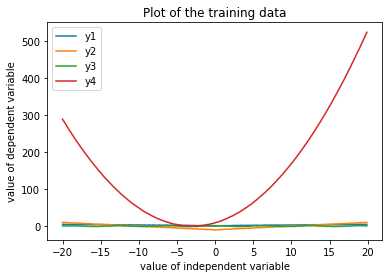

In [2]:
# Ploting the raw four training functions

dtr = pd.read_sql('train_table', reg_db)  # Read the training functions data from the sql database
x = dtr.iloc[:, 0]  # Selecting the first column as x axis
y1 = dtr.iloc[:, 1:] # Selecting the second to last columns as y axis
plt.plot(x,y1)
plt.title('Plot of the training data')
plt.xlabel('value of independent variable')
plt.ylabel('value of dependent variable')
plt.legend(y1, loc = 0)
plt.show()

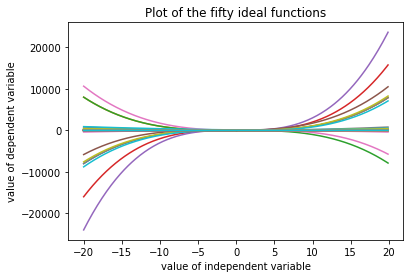

In [3]:
# Ploting he entire fifty ideal functions from which four best will be selected

di = pd.read_sql('ideal_table', reg_db)  # Read the ideal functions data from the sql database
x = di.iloc[:, 0]   # Selecting the first column as x axis
y2 = di.iloc[:, 1:]  # Selecting the second to last columns as y axis
plt.plot(x,y2)
plt.title('Plot of the fifty ideal functions')
plt.xlabel('value of independent variable')
plt.ylabel('value of dependent variable')
plt.show()

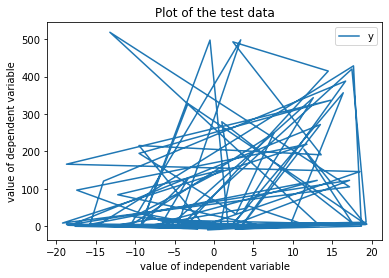

In [4]:
# Ploting the raw test datasets

dte = pd.read_sql('test_table', reg_db)  # Read the test data from the sql database
x = dte.iloc[:, 0]  # Selecting the first column as x axis
y3 = dte.iloc[:, 1:]  # Selecting the second to last columns as y axis
plt.plot(x,y3)
plt.title('Plot of the test data')
plt.xlabel('value of independent variable')
plt.ylabel('value of dependent variable')
plt.legend(y3, loc = 0)
plt.show()

In [5]:
def four_least_deviation():
    
    """ 
    This calculates the least square deviation between the train data and ideal functions 
    data, and extract the best four ideal functions from the given fifty ideal functions 
    """
    
    entire_sq_dev = []
    for v, index in dtr.columns[1:]:  # iterating the value, index of the train data columns
        modify = pd.DataFrame(columns = [])
        for i in range(len(dtr)):
            
            try:
                sq_dev = ((dtr.iloc[i,int(index)])-(di.iloc[i,1:51]))**2  # Calculating the square deviation
            except ValueError:
                print('The data value is not supported')
            except TypeError:
                print('The data type is not supported')
                
            modify = modify.append(sq_dev)  # Add up the individual square deviation
        entire_sq_dev.append(modify)  # Overall individual square deviation
    square_deviation = pd.concat(entire_sq_dev, axis=1)  # Join the overall individual square deviation
    square_deviation.to_sql('square_deviation', reg_db, if_exists = 'replace', index = False)  # Load to database
    sum_square_deviation = square_deviation.sum(axis=0)  # Sum of the square deviation
    sorted_square_deviation = sum_square_deviation.sort_values(ascending=True)  # # Sorting the square deviation sum
    four_ideal_sum = sorted_square_deviation[:4]  # Selecting the best 4 ideal functions
    return four_ideal_sum
sum4_deviation = four_least_deviation()
sum4_deviation

y2     29.837529
y35    30.393017
y50    32.047358
y20    33.458035
dtype: float64

In [ ]:
# Testing the four_least_deviation function

class DeviationTestCase(unittest.TestCase):  # Create inheritance from class unittest.TestCase
    """This test the four_least_deviation function"""
    
    def test_four_ideal(self):
        """To confirm the correctness of the outcome"""

        sum4_deviation= four_least_deviation()
        with self.assertRaises(ValueError):  # Catching any value error
            self.assertEqual(sum4_deviation.values, four_least_deviation().values)  # comparing the values
if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)

In [7]:
# Load the selected four ideal functions to the database

dsf = di.loc[:, ('x','y2', 'y35', 'y50', 'y20')]
dsf.to_sql('selected_4_ideal_fxn', reg_db, if_exists = 'replace', index = False)

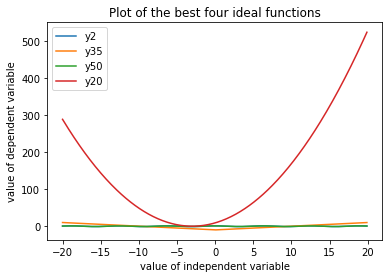

In [8]:
# Ploting the derived best four ideal functions

d4i = pd.read_sql('selected_4_ideal_fxn', reg_db)  # Read the four ideal functions data from the sql database
x = d4i.iloc[:, 0]  # Selecting the first column as x axis
y = d4i.iloc[:, 1:]  # Selecting the second to last columns as y axis
plt.plot(x,y)
plt.title('Plot of the best four ideal functions')
plt.xlabel('value of independent variable')
plt.ylabel('value of dependent variable')
plt.legend(y, loc = 0)
plt.show()

In [9]:
# Maximum deviation between the test data and 4 idea functions

test_4ideal_deviation = []
for index, row in dte.iterrows():  # iterating the row of the test data
    for index, row2 in d4i.iterrows():  # iterating the row of the selected 4 ideal functions
        if(row['x']) == (row2['x']):  # Affirming that the index row in test data is in the selected 4 ideal functions
            
            try:
                test_4ideal_deviation.append(row[1] - row2[1:])  # Differences in value
            except ValueError:
                print('The data value is not supported')
            
test_4ideal_deviation_df = pd.DataFrame(test_4ideal_deviation)  # convert the list to DataFrame
dev_max1 = test_4ideal_deviation_df.max()  # maximum deviation between the test data and the selected 4 ideal functions
dev_max1

y2     517.900816
y35    515.506700
y50    517.985257
y20    491.451400
dtype: float64

In [10]:
# Maximum deviation between the train and the selected four ideal functions

train_4ideal_deviation = []
for index, row in dtr.iterrows():  # iterating the row of the train data
    for index, row2 in d4i.iterrows():  # iterating the row of the selected 4 ideal functions
        if(row['x']) == (row2['x']):  # Affirming that the index row in train data is in the selected 4 ideal function
            
            try:
                train_4ideal_deviation.append({'y2': row['y1']-row2['y2'], 'y35': row['y2']-row2['y35'], 'y50':row['y3']-row2['y50'], 'y20':row['y4']-row2['y20'] })
            except ValueError:
                print('The data value is not supported')
    
train_4ideal_deviation_df = pd.DataFrame(train_4ideal_deviation)  # convert the list to DataFrame
dev_max2 = train_4ideal_deviation_df.max()  # maximum deviation between the train data and the selected 4 ideal functions
dev_max2_update = dev_max2 * math.sqrt(2)
dev_max2_update

y2     7.613491
y35    0.705142
y50    0.900324
y20    0.699088
dtype: float64

In [11]:
# Criterion to mapped test case only if maximum test_4ideal deviation is less than or equal to train_4ideal deviation

dev_max1.le(dev_max2_update, fill_value=0)  # The criterion is not met as maximum test-ideal is greater
                                            # Thus, the individual test case cannot be mapped

y2     False
y35    False
y50    False
y20    False
dtype: bool

In [ ]:
# Testing the outcome of the two deviations comparison

class DeviationTestCase(unittest.TestCase):  # Create inheritance from class unittest.TestCase
    """This test the four_least_deviation function"""
    
    def test_four_ideal(self):
        """To confirm the correctness of the outcome"""
        
        with self.assertRaises(ValueError):  # Catching any value error
            self.assertGreaterEqual(dev_max1.values, dev_max2_update.values)  # comparing the values
            
if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)